In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
#import pydot
#import graph_tool as gt

In [2]:
dframe = pd.read_csv("Quiz_Dataset.csv")

In [3]:
num_samples = 100
X = np.linspace(-np.pi,np.pi,num_samples)
X

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [4]:
Y = X/2 + np.sin(X) + np.random.random(X.shape)
Y

array([-0.77702301, -1.50912769, -0.65321421, -0.80127786, -1.37449557,
       -1.3942218 , -1.42105318, -1.20007092, -1.69035215, -1.24240018,
       -1.57092015, -1.67312629, -1.28413854, -1.01817012, -1.1795813 ,
       -1.25248291, -1.24449087, -1.17993813, -1.22893915, -1.42120615,
       -1.80548009, -1.83445625, -1.10789212, -1.35293535, -1.09586288,
       -1.54672101, -1.06188644, -1.57916529, -1.41867462, -1.20671643,
       -0.58434691, -1.09165363, -0.74505784, -1.08682317, -0.61894559,
       -0.54437045, -0.41376775, -0.12297191, -0.14006483, -0.43091607,
       -0.17251892,  0.01867406,  0.15137135, -0.17468743,  0.43514318,
       -0.01706777,  0.41608298,  0.69704298,  0.14555625,  0.36640412,
        0.79871201,  1.06009677,  0.59381239,  0.69319208,  0.51369808,
        1.24935697,  1.16180566,  1.15178406,  1.14694808,  1.84889906,
        1.62111881,  1.13626191,  1.24862352,  1.62743552,  1.96240048,
        1.91916225,  2.22381702,  1.53141848,  2.07058292,  1.65

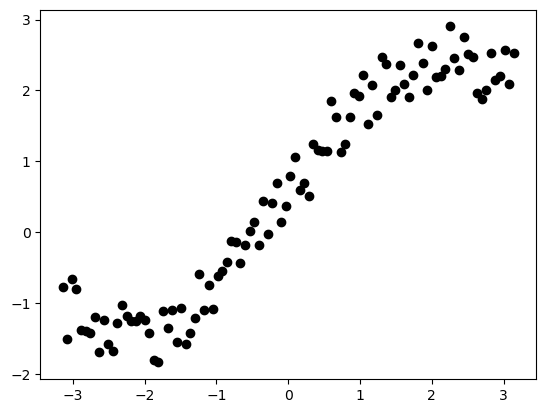

In [5]:
plt.scatter(X , Y, color='black')

In [6]:
random_indices = np.random.permutation(num_samples)
print(random_indices)

[79 16 37 52 40  4 95  3 43 76 27 50 66 72  8 77 15 97 12 47 51 31 71 18
  0 30 94 88 74  1 49 42 14 24 81 38 92 25 57 11 90 28 73 78 13 26 63 62
 29 10 58 54 35 55 61 82 96 59 87 93  5 65 36 20  6 17  2 53 56 98 44 22
 60 80 21 69 39 89 99 41 85 45 34 46 84 83  9 33 48 86 68 70 19 32 64 23
 75 67 91  7]


In [7]:
train_size = 70
x_train = X[random_indices[:train_size]]
y_train = Y[random_indices[:train_size]]

In [8]:
val_start = train_size
val_end = 85
x_val = X[random_indices[val_start:val_end]]
y_val = Y[random_indices[val_start:val_end]]

In [9]:
test_start = val_end
test_end = num_samples
x_test = X[random_indices[test_start:test_end]]
y_test = Y[random_indices[test_start:test_end]]

In [10]:
print("x_test: ",x_test)
print("y_test: ",y_test)

x_test:  [ 2.12612836 -2.57039399 -1.04719755 -0.09519978  2.31652792  1.17413059
  1.30106362 -1.93572881 -1.11066407  0.92026451 -1.68186273  1.61839622
  1.11066407  2.63386051 -2.69732703]
y_test:  [ 2.20055569 -1.24240018 -1.08682317  0.14555625  2.45941794  2.07058292
  2.46963124 -1.42120615 -0.74505784  1.96240048 -1.35293535  2.08991971
  1.53141848  1.95784876 -1.20007092]


In [11]:
Model = LinearRegression()

In [12]:
mod_x = np.asarray(x_train).reshape(len(x_train),1)
mod_y = np.asarray(y_train).reshape(len(y_train),1)

In [13]:
Model.fit(mod_x, mod_y)

LinearRegression()

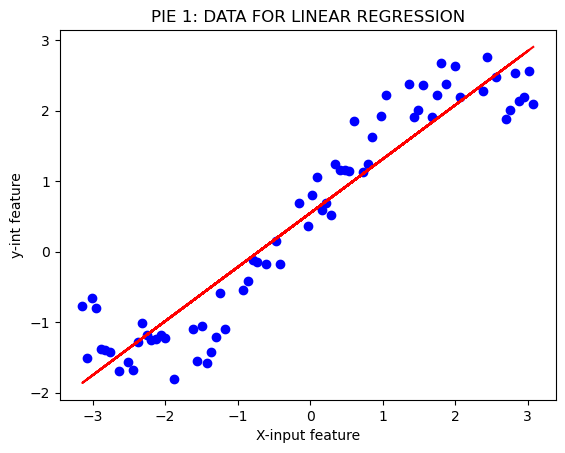

In [14]:
plt.scatter(x_train, y_train, color='blue')
M = np.array(x_train).reshape(-1,1)
N = Model.predict(M)
plt.plot(M, N, color = 'red')
plt.title('PIE 1: DATA FOR LINEAR REGRESSION')
plt.xlabel('X-input feature')
plt.ylabel('y-int feature')
plt.show()

In [15]:
mm_val_error = np.mean((Model.predict(x_val.reshape(len(x_val), 1))) ** 2)
mm_val_error


2.272762649452259

In [16]:
mm_test_error = np.mean((Model.predict(x_test.reshape(len(x_test), 1))) ** 2)
mm_val_error

2.272762649452259

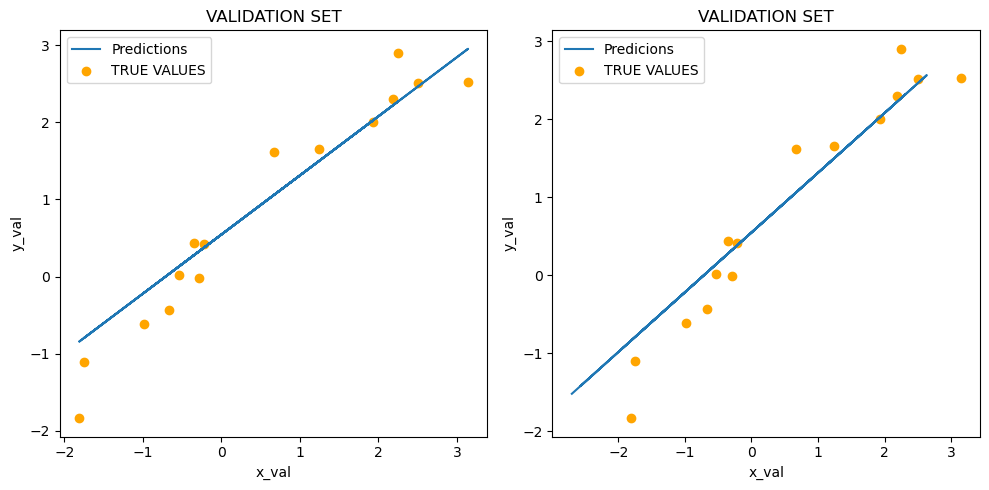

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(x_val, Model.predict(x_val.reshape(-1,1)), label = "Predictions")
ax[0].scatter(x_val, y_val, color = 'orange', label = "TRUE VALUES")
ax[0].set_xlabel('x_val')
ax[0].set_ylabel('y_val')
ax[0].set_title('VALIDATION SET')
ax[0].legend()
ax[1].plot(x_test, Model.predict(x_test.reshape(-1,1)), label = 'Predicions')
ax[1].scatter(x_val, y_val, color = 'orange', label = "TRUE VALUES")
ax[1].set_xlabel('x_val')
ax[1].set_ylabel('y_val')
ax[1].set_title('VALIDATION SET')
ax[1].legend()
plt.tight_layout()
plt.show()

In [18]:
loan = pd.read_csv("loan.csv")

In [19]:
print(loan.head(10))

   Income  Loan Amount Default
0      15            8      No
1      30            8      No
2       5            9     Yes
3      22           10      No
4      33           12      No
5      18           15      No
6      28           20      No
7      12           21     Yes
8      24           22     Yes
9       9           30     Yes


In [20]:
print(loan.info())
print(loan.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes
None
          Income  Loan Amount
count  30.000000    30.000000
mean   18.766667    51.966667
std     8.572946    34.055212
min     5.000000     8.000000
25%    13.000000    21.250000
50%    18.000000    49.000000
75%    25.500000    79.500000
max    34.000000   110.000000


In [21]:
import seaborn as sns

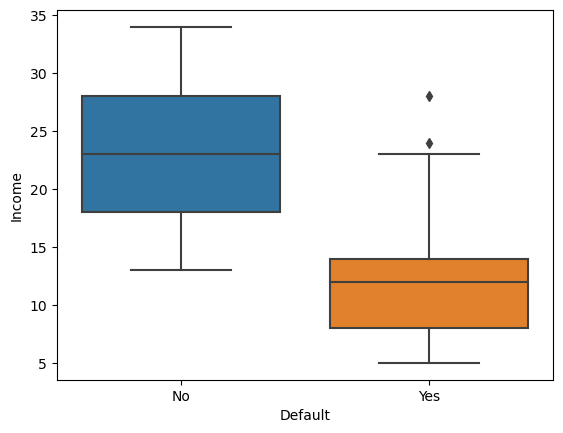

In [22]:
sns.boxplot(x="Default", y="Income", data=loan)
plt.show()

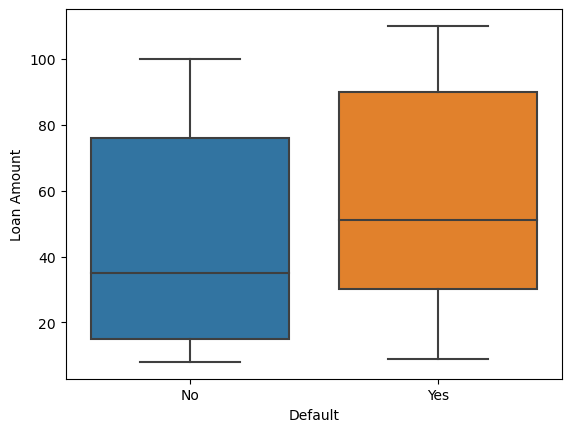

In [23]:
sns.boxplot(x="Default", y="Loan Amount", data=loan)
plt.show()

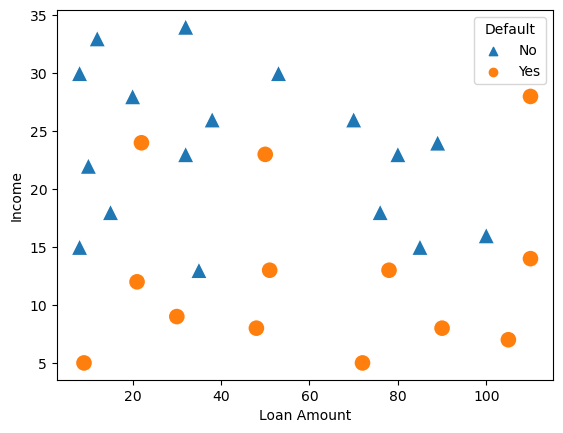

In [24]:
sns.scatterplot(x="Loan Amount", y="Income", hue="Default", style="Default", markers=["^", "o"], s=150, data=loan)
plt.show()

In [25]:
A = loan[["Default"]]
B = loan[["Income", "Loan Amount"]]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(B, A, test_size=0.2, random_state=1234, stratify=A)

In [27]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (24, 2)
X_test shape: (6, 2)


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
classifier = DecisionTreeClassifier(random_state=1234)

In [30]:
Model = classifier.fit(X_train, y_train.values.ravel())
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [31]:
score = Model.score(X_test, y_test)
print("Decision Tree Score: ", score)

Decision Tree Score:  0.5


In [32]:
fig = plt.figure(figsize=(15,15))


<Figure size 1500x1500 with 0 Axes>

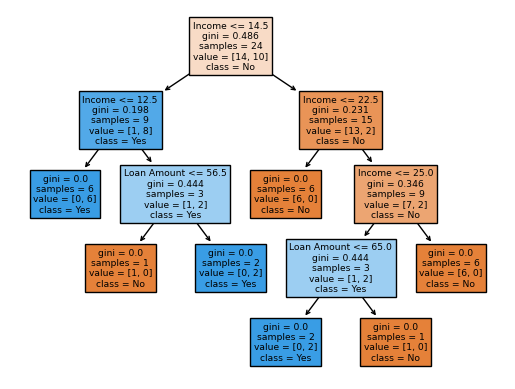

In [33]:
plot_tree(Model, feature_names=(B.columns), class_names=['No', 'Yes'], filled=True)
plt.show()